In [1]:
#Importing the libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from textblob import TextBlob #used for sentiment analysis
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

In [2]:
import pandas as pd
df = pd.read_csv('C:/Users/E7440/Projects_22/PyProject workspace/Python-Projects/Netflix-titles-Analysis/Netflix_data.csv')
df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
# cheak the shape of the dataset
print(f'This dataset contains: \n {df.shape[0]} rows and \n {df.shape[1]} columns')


This dataset contains: 
 8807 rows and 
 12 columns


In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
df = df.drop(['date_added', 'description'], axis=1)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [10]:
# now cheak the updated data's rows and columns
print(f'This dataset contains {df.shape[0]} rows and {df.shape[1]} columns now')

This dataset contains 8807 rows and 10 columns now


In [11]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [12]:
#cheak the missing value
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [13]:
#percentage of the missing value
df.isnull().sum() * 100 / len(df)

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
dtype: float64

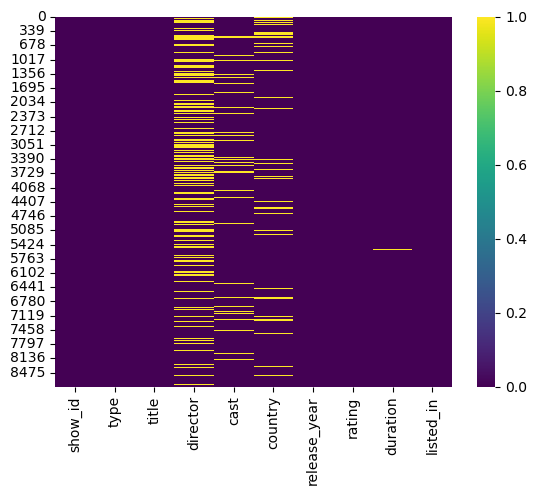

In [17]:
# visulaize the missing value
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(),cmap='viridis')
plt.show()

In [18]:
df.dropna(subset= ['duration'], inplace=True)

In [19]:
df.shape

(8804, 10)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      6170 non-null   object
 4   cast          7979 non-null   object
 5   country       7973 non-null   object
 6   release_year  8804 non-null   int64 
 7   rating        8800 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8804 non-null   object
dtypes: int64(1), object(9)
memory usage: 756.6+ KB


In [21]:
df.dropna(subset= ["director", 'cast'], inplace=True)
df.shape

(5697, 10)

In [22]:
df["country"].fillna(df["country"].mode()[0], inplace=True)
df["rating"].fillna(df["rating"].mode()[0], inplace=True)
df.shape

(5697, 10)

In [23]:
#Checking the porcentage of null values at hits point
df.isnull().sum()/len(df)*100

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
dtype: float64

In [24]:
df['type'].value_counts()

type
Movie      5519
TV Show     178
Name: count, dtype: int64